In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# This is the way...to do it!

In [62]:
class0 = pd.DataFrame(9*np.random.rand(50,2), columns = ['x','y'])
class1 = pd.DataFrame(9*np.random.rand(50,2), columns = ['x','y'])

In [63]:
# First is the hinged plane

z0 = [y - 9*np.random.rand() if y > 4 else 3.9*np.random.rand() for y in class0['y']]
class0['z'] = z0

z1 = [y + 3*np.random.rand() if y > 4 else 4.1*np.random.rand() + 4 for y in class1['y']]
class1['z'] = z1

<IPython.core.display.Javascript object>


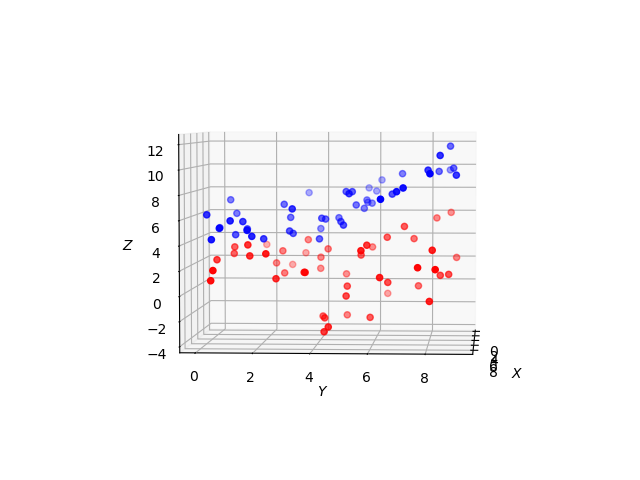

In [64]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class0['x'], class0['y'], class0['z'], color = 'r')
ax.scatter(class1['x'], class1['y'], class1['z'], color = 'b')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$');
ax.set_zlabel('$Z$');

In [65]:
# Now the paraboloid

z0 = [-0.5*(y-4.5)**2*np.random.rand() + 3 for y in class0['y']]
class0['z_para'] = z0

z1 = [-0.5*(y-4.5)**2*np.random.rand() + 6 for y in class1['y']]
class1['z_para'] = z1

<IPython.core.display.Javascript object>


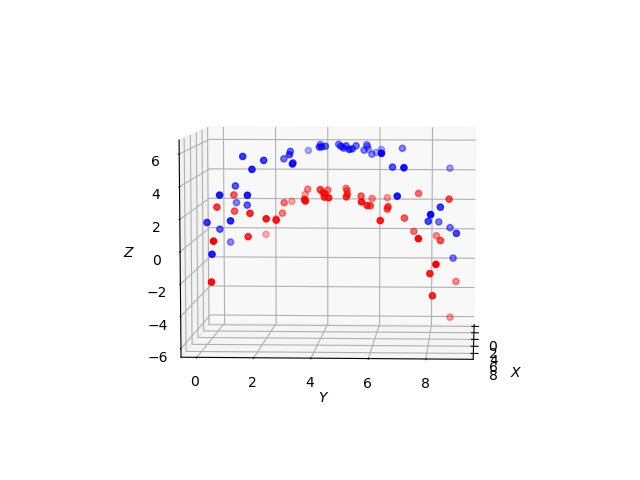

In [66]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class0['x'], class0['y'], class0['z_para'], color = 'r')
ax.scatter(class1['x'], class1['y'], class1['z_para'], color = 'b')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$');
ax.set_zlabel('$Z$');

In [67]:
# Now for a sinusoidal distribution

z0 = [np.sin(2*y)*np.random.rand() + 3 for y in class0['y']]
class0['z_sin'] = z0

z1 = [np.sin(2*y)*np.random.rand() + 4 for y in class1['y']]
class1['z_sin'] = z1

<IPython.core.display.Javascript object>


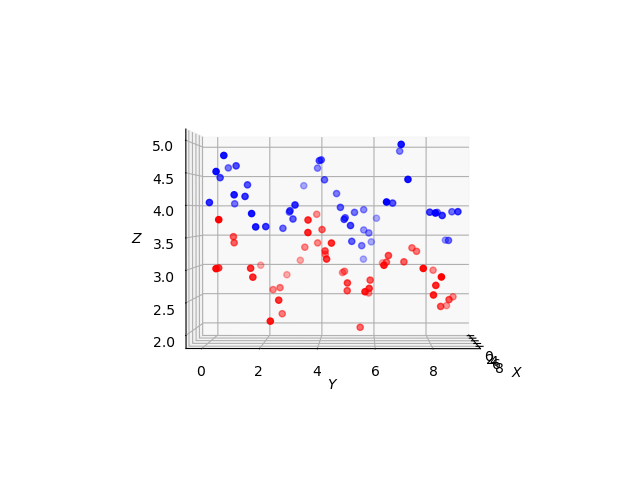

In [68]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class0['x'], class0['y'], class0['z_sin'], color = 'r')
ax.scatter(class1['x'], class1['y'], class1['z_sin'], color = 'b')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$');
ax.set_zlabel('$Z$');

In [71]:
# Adding class labels to the DataFrames

class0['label'] = 0
class1['label'] = 1

In [81]:
""" I want to plot somewhat randomized datasets for use in classification visualizations. 
    For now I'll focus on three geometric shapes, ranging from least complicated to most.
    
    The least complicated shape will be a dataset with two classes that can be separated 
    by two planes (like a hinged plane).
    After that, I'll make a dataset that can be separated by a paraboloid.
    Finally, I'll make a dataset that can be separated by a sinusoidal surface.
    
    Each dataset may have some overlap between classes due to random noise.
"""

class Shape:
    def __init__(this):
        # Generate 2 random sets of (x,y) coordinates
        this.class0 = pd.DataFrame(9*np.random.rand(50,2), columns = ['x','y'])
        this.class1 = pd.DataFrame(9*np.random.rand(50,2), columns = ['x','y'])
        
        # Generate the hinged planes
        this.class0['z_plane'] = [y - 9*np.random.rand() if y > 4 else 3.9*np.random.rand() for y in this.class0['y']]
        this.class1['z_plane'] = [y + 3*np.random.rand() if y > 4 else 4.1*np.random.rand() + 4 for y in this.class1['y']]
        
        # Generate the paraboloid data
        this.class0['z_para'] = [-0.5*(y-4.5)**2*np.random.rand() + 3 for y in this.class0['y']]
        this.class1['z_para'] = [-0.5*(y-4.5)**2*np.random.rand() + 6 for y in this.class1['y']]
        
        # Generate the sinusoidal data
        this.class0['z_sin'] = [np.sin(2*y)*np.random.rand() + 3 for y in this.class0['y']]
        this.class1['z_sin'] = [np.sin(2*y)*np.random.rand() + 4 for y in this.class1['y']]
        
        # Assign the class labels
        this.class0['label'] = 0
        this.class1['label'] = 1
        
    def plot(this, kind = 'z_plane'):
        """ Generate the 3D shape with two classes. """
        
        if kind in ['z_plane','z_para','z_sin']:
            %matplotlib notebook

            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            ax.scatter(this.class0['x'], this.class0['y'], this.class0[kind], color = 'r')
            ax.scatter(this.class1['x'], this.class1['y'], this.class1[kind], color = 'b')

            ax.set_xlabel('$X$')
            ax.set_ylabel('$Y$');
            ax.set_zlabel('$Z$');
            
        return None
    
    def prep(this, kind = 'z_plane'):
        """ Prepare the data for use with keras """
        
        this.data = pd.concat([this.class0, this.class1])
        this.data.index = np.arange(len(this.data))
        
        this.x_train = this.data[['x','y',kind]].loc[:49]
        this.x_test = this.data[['x','y',kind]].loc[50:]
        
        this.y_train = this.data['label'].loc[:49]
        this.y_test = this.data['label'].loc[50:]

<IPython.core.display.Javascript object>


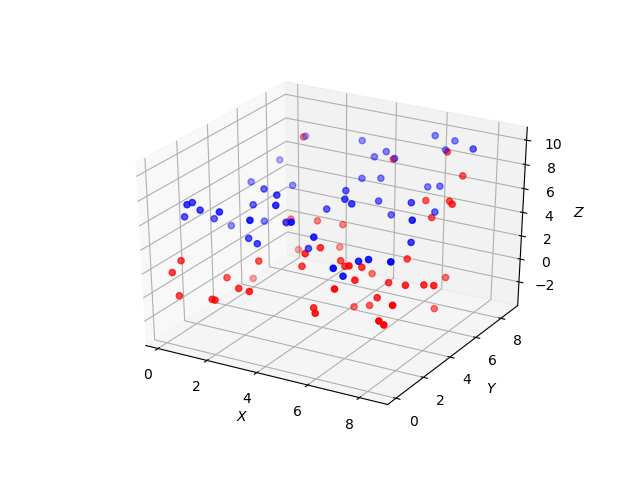

In [82]:
shape = Shape()
shape.plot()

In [83]:
shape.prep()

           x         y   z_plane    z_para     z_sin  label
0   1.070461  7.454711 -1.395878  0.043133  3.319731      0
1   6.366095  8.745431  8.356600  2.096800  2.166268      0
2   3.088309  0.564537  1.377963 -0.420086  3.235987      0
3   2.134528  5.857267 -1.114068  2.226096  2.923542      0
4   2.603640  7.798944 -0.733225 -1.042743  3.073348      0
..       ...       ...       ...       ...       ...    ...
95  4.906578  6.948141  9.016208  5.260334  4.782652      1
96  4.400119  3.625956  6.456808  5.764466  4.755813      1
97  4.554075  0.938367  7.455210  5.245688  4.295905      1
98  6.809356  8.415074  9.674881 -0.307582  3.548960      1
99  4.560519  6.731247  8.595732  5.996414  4.627229      1

[100 rows x 6 columns]
